# This is a demo for our paper "ParamNet: a parameter-variable network for fast stain normalization"

In [1]:
import numpy as np
import torch
from source.model import ParamNet
from PIL import Image 
import matplotlib.pyplot as plt
%matplotlib inline

/home/khtao/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def norm(image):
    image = np.array(image).astype(np.float32)
    image = image.transpose((2, 0, 1))
    image = ((image / 255) - 0.5) / 0.5
    image=image[np.newaxis, ...]
    image=torch.from_numpy(image)
    return image

def un_norm(image):
    image = image.cpu().detach().numpy()[0]
    image = ((image * 0.5 + 0.5) * 255).astype(np.uint8).transpose((1,2,0))
    return image

# The demo for one-to-one stain normalization

In [3]:
#read source image
img_source_cyp=Image.open("assets/aligned/aligned_cyp_source.png")
img_target_cyp=Image.open("assets/aligned/aligned_cyp_target.png")
img_source_hist=Image.open("assets/aligned/aligned_hist_source.png")
img_target_hist=Image.open("assets/aligned/aligned_hist_target.png")

In [4]:
# run on the aligned dataset
model_cyp = ParamNet()
model_cyp.load_state_dict(torch.load("checkpoints/ParamNet-source.pt")['net_G_A'])
img_norm_cyp=model_cyp(norm(img_source_cyp))
img_norm_cyp=un_norm(img_norm_cyp)

model_hist = ParamNet()
model_hist.load_state_dict(torch.load("checkpoints/ParamNet-aperio.pt")['net_G_A'])
img_norm_hist=model_hist(norm(img_source_hist))
img_norm_hist=un_norm(img_norm_hist)

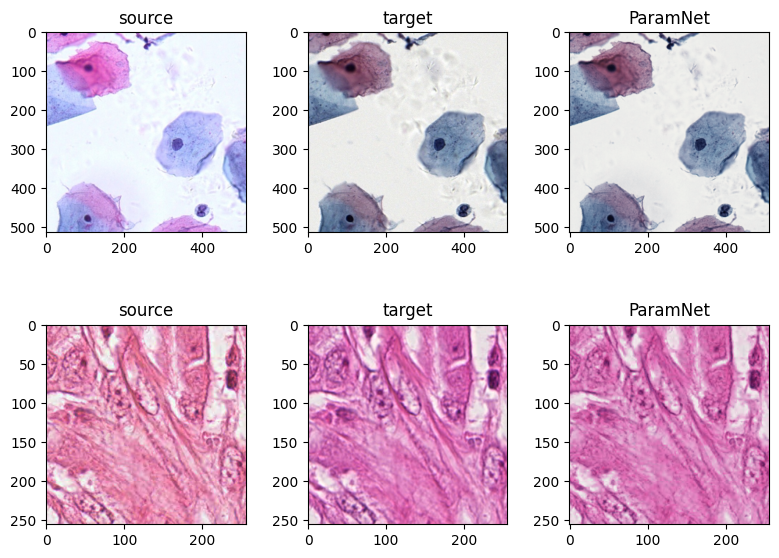

In [5]:
fig,axes=plt.subplots(2,3,figsize=(8, 6))
#plt.subplots_adjust(wspace =0.25, hspace =0.25)#调整子图间距
fig.tight_layout()
axes[0,0].imshow(img_source_cyp)
axes[0,0].set_title('source')
axes[0,1].imshow(img_target_cyp)
axes[0,1].set_title('target')
axes[0,2].imshow(img_norm_cyp)
axes[0,2].set_title('ParamNet')
axes[1,0].imshow(img_source_hist)
axes[1,0].set_title('source')
axes[1,1].imshow(img_target_hist)
axes[1,1].set_title('target')
axes[1,2].imshow(img_norm_hist)
axes[1,2].set_title('ParamNet')
plt.show()

# The demo for multi-to-one stain normalization

## 1. Cyptopathology

In [6]:
#read source image
img_D2=Image.open("assets/D2-D5/ori_D2.png")
img_D3=Image.open("assets/D2-D5/ori_D3.png")
img_D4=Image.open("assets/D2-D5/ori_D4.png")
img_D5=Image.open("assets/D2-D5/ori_D5.png")

img_D1_1=Image.open("assets/D1/1.png")
img_D1_2=Image.open("assets/D1/2.png")
img_D1_3=Image.open("assets/D1/3.png")
img_D1_4=Image.open("assets/D1/4.png")

In [7]:
model_D2_5 = ParamNet()
model_D2_5.load_state_dict(torch.load("checkpoints/ParamNet-D1.pt")['net_G_A'])
img_norm_D2=model_D2_5(norm(img_D2))
img_norm_D2=un_norm(img_norm_D2)

img_norm_D3=model_D2_5(norm(img_D3))
img_norm_D3=un_norm(img_norm_D3)

img_norm_D4=model_D2_5(norm(img_D4))
img_norm_D4=un_norm(img_norm_D4)

img_norm_D5=model_D2_5(norm(img_D5))
img_norm_D5=un_norm(img_norm_D5)

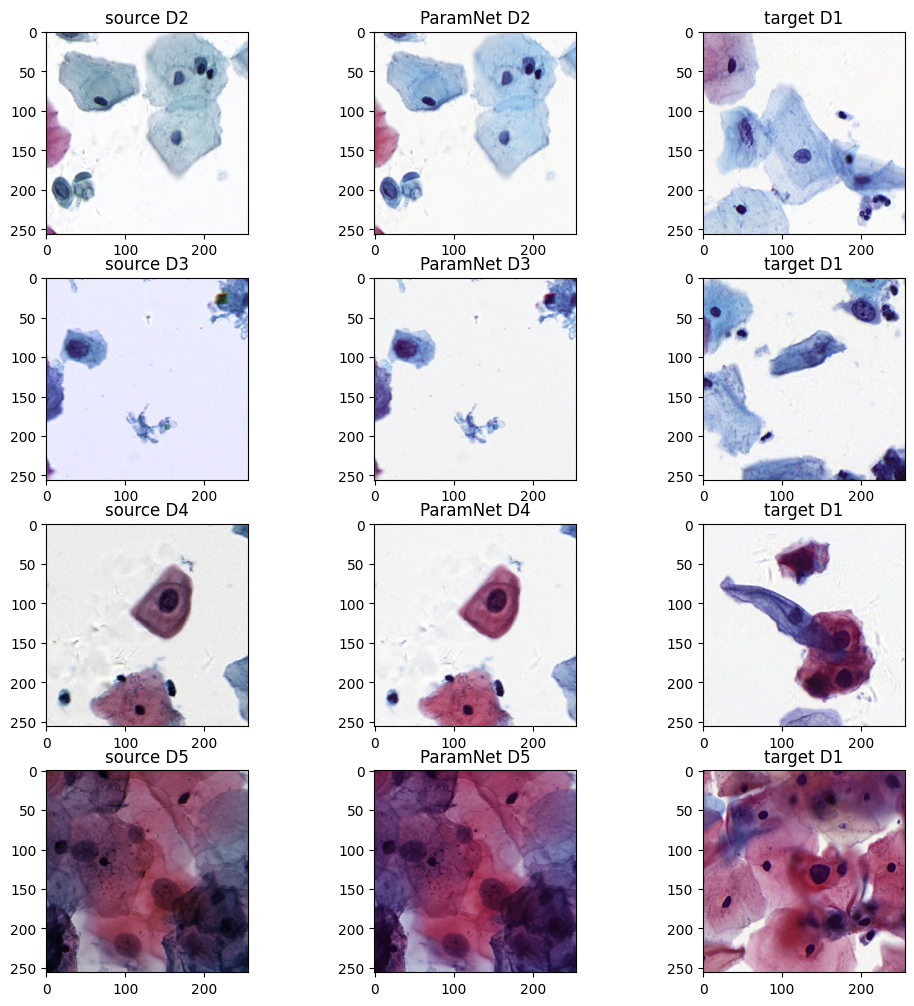

In [8]:
fig,axes=plt.subplots(4,3,figsize=(10, 10))

#plt.subplots_adjust(wspace =0.25, hspace =0.25)#调整子图间距
fig.tight_layout()
axes[0,0].imshow(img_D2)
axes[0,0].set_title('source D2')
axes[1,0].imshow(img_D3)
axes[1,0].set_title('source D3')
axes[2,0].imshow(img_D4)
axes[2,0].set_title('source D4')
axes[3,0].imshow(img_D5)
axes[3,0].set_title('source D5')


axes[0,1].imshow(img_norm_D2)
axes[0,1].set_title('ParamNet D2')
axes[1,1].imshow(img_norm_D3)
axes[1,1].set_title('ParamNet D3')
axes[2,1].imshow(img_norm_D4)
axes[2,1].set_title('ParamNet D4')
axes[3,1].imshow(img_norm_D5)
axes[3,1].set_title('ParamNet D5')

axes[0,2].imshow(img_D1_1)
axes[0,2].set_title('target D1')
axes[1,2].imshow(img_D1_2)
axes[1,2].set_title('target D1')
axes[2,2].imshow(img_D1_3)
axes[2,2].set_title('target D1')
axes[3,2].imshow(img_D1_4)
axes[3,2].set_title('target D1')

plt.show()

## 2. Histopathology

In [9]:
#read source image
img_C1=Image.open("assets/C1-C5/source_C1.png")
img_C2=Image.open("assets/C1-C5/source_C2.png")
img_C3=Image.open("assets/C1-C5/source_C3.png")
img_C4=Image.open("assets/C1-C5/source_C4.png")
img_C5=Image.open("assets/C1-C5/source_C5.png")

img_Uni16_1=Image.open("assets/Uni16/Uni_1.png")
img_Uni16_2=Image.open("assets/Uni16/Uni_2.png")
img_Uni16_3=Image.open("assets/Uni16/Uni_3.png")
img_Uni16_4=Image.open("assets/Uni16/Uni_4.png")
img_Uni16_5=Image.open("assets/Uni16/Uni_5.png")

In [10]:
model_C1_5 = ParamNet()
model_C1_5.load_state_dict(torch.load("checkpoints/ParamNet-Uni.pt")['net_G_A'])

img_norm_C1=model_C1_5(norm(img_C1))
img_norm_C1=un_norm(img_norm_C1)

img_norm_C2=model_C1_5(norm(img_C2))
img_norm_C2=un_norm(img_norm_C2)

img_norm_C3=model_C1_5(norm(img_C3))
img_norm_C3=un_norm(img_norm_C3)

img_norm_C4=model_C1_5(norm(img_C4))
img_norm_C4=un_norm(img_norm_C4)

img_norm_C5=model_C1_5(norm(img_C5))
img_norm_C5=un_norm(img_norm_C5)



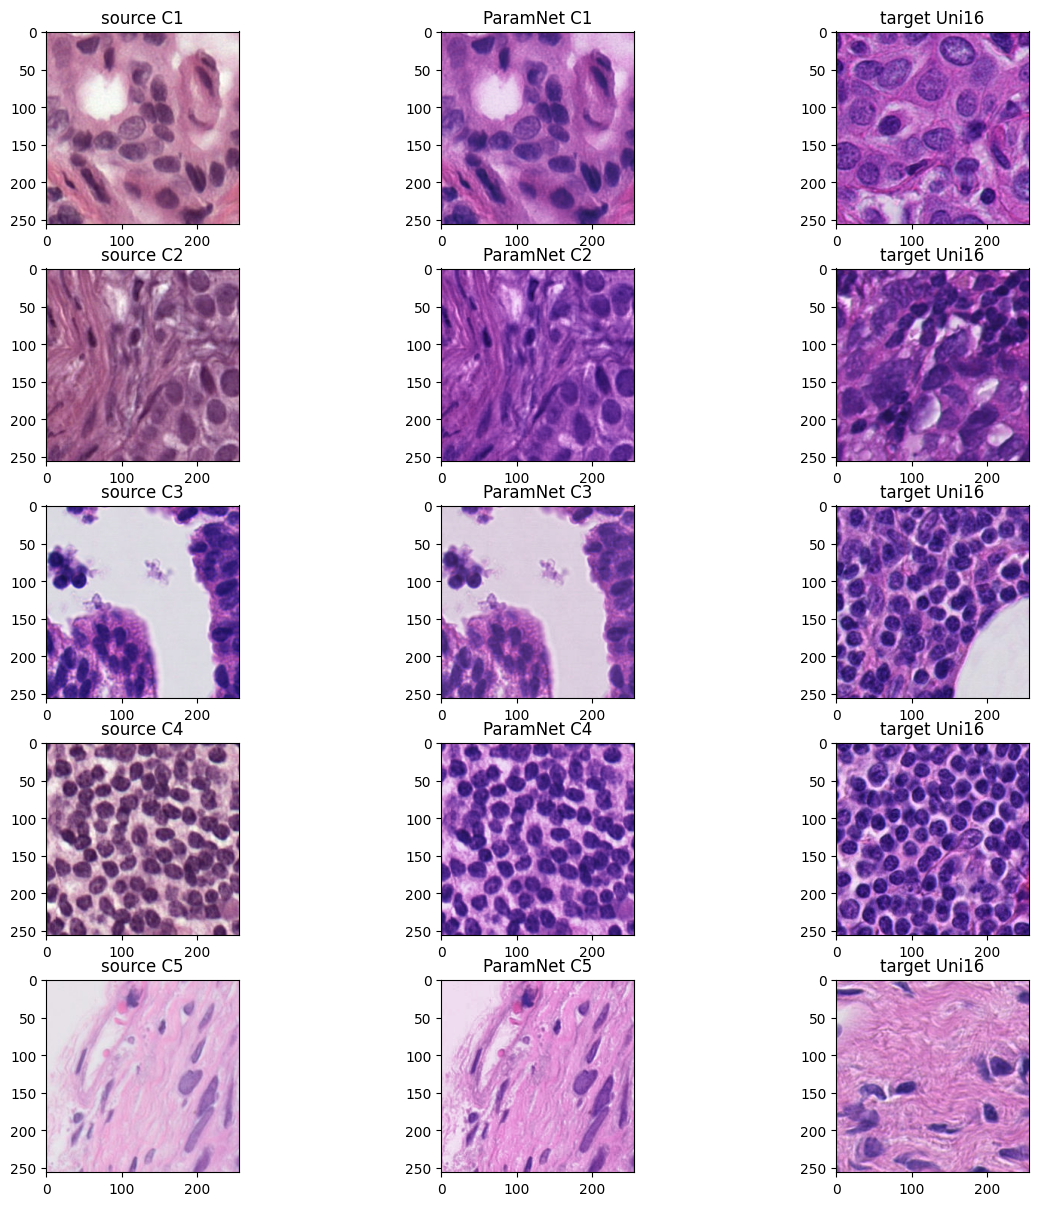

In [11]:
fig,axes=plt.subplots(5,3,figsize=(12, 12))

#plt.subplots_adjust(wspace =0.25, hspace =0.25)#调整子图间距
fig.tight_layout()
axes[0,0].imshow(img_C1)
axes[0,0].set_title('source C1')
axes[1,0].imshow(img_C2)
axes[1,0].set_title('source C2')
axes[2,0].imshow(img_C3)
axes[2,0].set_title('source C3')
axes[3,0].imshow(img_C4)
axes[3,0].set_title('source C4')
axes[4,0].imshow(img_C5)
axes[4,0].set_title('source C5')

axes[0,1].imshow(img_norm_C1)
axes[0,1].set_title('ParamNet C1')
axes[1,1].imshow(img_norm_C2)
axes[1,1].set_title('ParamNet C2')
axes[2,1].imshow(img_norm_C3)
axes[2,1].set_title('ParamNet C3')
axes[3,1].imshow(img_norm_C4)
axes[3,1].set_title('ParamNet C4')
axes[4,1].imshow(img_norm_C5)
axes[4,1].set_title('ParamNet C5')

axes[0,2].imshow(img_Uni16_1)
axes[0,2].set_title('target Uni16')
axes[1,2].imshow(img_Uni16_2)
axes[1,2].set_title('target Uni16')
axes[2,2].imshow(img_Uni16_3)
axes[2,2].set_title('target Uni16')
axes[3,2].imshow(img_Uni16_4)
axes[3,2].set_title('target Uni16')
axes[4,2].imshow(img_Uni16_5)
axes[4,2].set_title('target Uni16')

plt.show()